In [63]:
import numpy as np
import math
import matplotlib.pyplot as plt
from numpy.linalg import norm
import matplotlib.pyplot as plt

In [64]:
np.random.seed(42)
def generate_random_numbers(n, mu, sigma, dist="normal"):
    if dist == "normal":
        return np.random.normal(mu, sigma, n)
    elif dist == "uniform":
        return np.random.uniform(mu - sigma/math.sqrt(3),mu + sigma/math.sqrt(3),n)
    else:
        raise Exception("The distribution {unknown_dist} is not implemented".format(unknown_dist=dist))

y_test = generate_random_numbers(5, 0, 0.1, "normal")
print(y_test)

[ 0.04967142 -0.01382643  0.06476885  0.15230299 -0.02341534]


In [107]:
y1 = generate_random_numbers(105, 0.5, 20.0, "normal")
y2 = generate_random_numbers(105, 0.5, 1.0, "uniform")
print(np.mean(y1))
print(np.mean(y2))

0.1361887864233144
0.5202402590686496


In [108]:
def IGD_wr_task1(y):
    
    def objf(x):
        return 1/2*norm(x-y)**2

    n = len(y)
    ordering = np.random.choice(n, n, replace=True)
    x = 0
    f_list = []
    
    for k in range(len(ordering)):
        f_list.append(objf(x))
        ga = 1/(k+1)
        x = x - ga*(x-y[ordering[k]])

        
    return x,f_list

In [109]:
x,f_list = IGD_wr_task1(y1)
print("x = ",x)
print("f = ",f_list[-1])

x =  -2.1167326771623607
f =  29923.193768341687


In [110]:
x,f_list = IGD_wr_task1(y2)
print("x = ",x)
print("f = ",f_list[-1])

x =  0.5548857785773224
f =  6.433129733316344


In [111]:
def IGD_wo_task1(y):
    
    def objf(x):
        return 1/2*norm(x-y)**2
    
    n = len(y)
    ordering = np.random.choice(n, n, replace=False)
    
    x = 0
    f_list = []
    
    for k in range(len(ordering)):
        f_list.append(objf(x))
        ga = 1/(k+1)
        x = x - ga*(x-y[ordering[k]])
        
    return x,f_list

In [112]:
x,f_list = IGD_wo_task1(y1)
print("x = ",x)
print("f = ",f_list[-1])


x =  0.1361887864233134
f =  29674.31642714296


In [113]:
x,f_list = IGD_wo_task1(y2)
print("x = ",x)
print("f = ",f_list[-1])

x =  0.5202402590686496
f =  6.3576490464814865


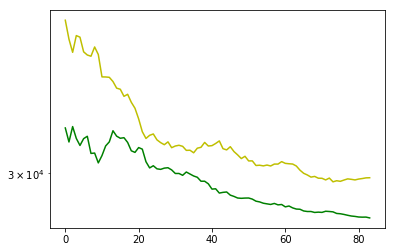

In [127]:
his = np.mean([IGD_wr_task1(y1)[1] for c in range(30)],axis=0)
her = np.mean([IGD_wo_task1(y1)[1] for c in range(30)],axis=0)

plt.semilogy(his[20:-1],color='y')
plt.semilogy(her[20:-1],color='g')

plt.show()

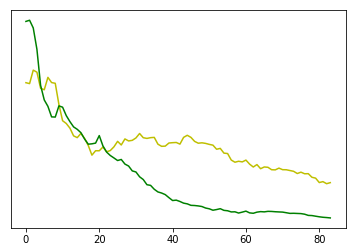

In [136]:
his = np.mean([IGD_wr_task1(y2)[1] for c in range(30)],axis=0)
her = np.mean([IGD_wo_task1(y2)[1] for c in range(30)],axis=0)

plt.semilogy(his[20:-1],color='y')
plt.semilogy(her[20:-1],color='g')

plt.show()

In [137]:
beta = np.random.uniform(1.0,2.0,size=30)

In [138]:
def IGD_wr_task2(y,beta):   
    
    def objf(x):
        a = (x-y)**2
        return 1/2*np.sum(a*np.array(beta))
    
    n = len(beta)
    ordering = np.random.choice(n, n, replace=True)
    x = 0
    f_list = []
    
    ga = 0.03/np.amin(beta)
    
    for k in range(len(ordering)):
        f_list.append(objf(x))
        x = x - ga*beta[ordering[k]]*(x-y)
        
    return x,f_list       

In [139]:
x,f_list = IGD_wr_task2(1,beta)
print("x = ",x)
print("f = ",f_list[-1])

x =  0.7529332078985905
f =  1.5156567679103292


In [140]:
def IGD_wo_task2(y,beta):
    
    def objf(x):
        a = (x-y)**2
        return 1/2*np.sum(a*np.array(beta))
    
    n = len(beta)
    ordering = np.random.choice(n, n, replace=False)
    x = 0
    f_list = []
    
    ga = 0.03/np.amin(beta)
    
    for k in range(len(ordering)):
        f_list.append(objf(x))
        x = x - ga*beta[ordering[k]]*(x-y)
        
        
    return x,f_list    


In [141]:
x,f_list = IGD_wo_task2(1,beta)
print("x = ",x)
print("f = ",f_list[-1])

x =  0.7458195587402016
f =  1.5927991896837683


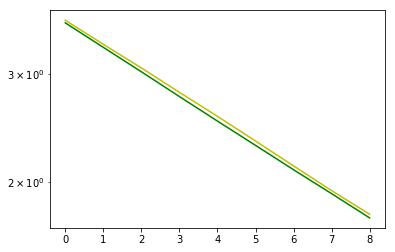

In [148]:
his = np.mean([IGD_wr_task2(1,beta)[1] for c in range(220)],axis=0)
her = np.mean([IGD_wo_task2(1,beta)[1] for c in range(220)],axis=0)

plt.semilogy(his[20:-1],color='y')
plt.semilogy(her[20:-1],color='g')

plt.show()

In [149]:
def generate_problem_task3(m, n, rho):
    A = np.random.normal(0., 1.0, (m, n))
    x = np.random.random(n) # uniform in (0,1)
    w = np.random.normal(0., rho, m)
    y = A@x + w
    return A, x, y

In [150]:
A, xstar, y = generate_problem_task3(200, 100, 0.01)

In [153]:
def IGD_wr_task3(y, A):
    
    AT = A.T
    def objf(x):
        return norm(A@x - y)**2
    
    n = A.shape[1]
    ordering = np.random.choice(n,n,replace=True)
    x = np.zeros(len(xstar))
    f_list = []
    x_list = []
    
    ga = 1e-3
    for k in range(len(ordering)):
        x_list.append(x)
        f_list.append(objf(x))
        
        x = x - ga*A[ordering[k]]*(np.dot(A[ordering[k]],x) - y[ordering[k]])
        
    return x,f_list,x_list

def IGD_wo_task3(y, A):
    
    AT = A.T
    def objf(x):
        return norm(A@x - y)**2
    
    n = A.shape[1]
    ordering = np.random.choice(n,n,replace=False)
    x = np.zeros(len(xstar))
    f_list = []
    x_list = []
    
    ga = 1e-3
    for k in range(len(ordering)):
        x_list.append(x)
        f_list.append(objf(x))
        
        x = x - ga*A[ordering[k]]*(np.dot(A[ordering[k]],x) - y[ordering[k]])
        
    return x,f_list,x_list

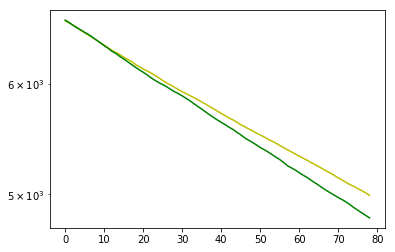

In [154]:
his = np.mean([IGD_wr_task3(y, A)[1] for c in range(200)],axis=0)
her = np.mean([IGD_wo_task3(y, A)[1] for c in range(200)],axis=0)

plt.semilogy(his[20:-1],color='y')
plt.semilogy(her[20:-1],color='g')

plt.show()